Iteration 0: Cost: 9471.902773879518, Weight: [[ 0.97545265  0.9787825   0.82721487  0.83811082 -0.29154987]], Bias: [0.09747448]
Iteration 1000: Cost: 346.4161387949065, Weight: [[-0.0195077   1.35185162 -2.06207219 -0.07558495  0.40405791]], Bias: [0.60111126]
Iteration 2000: Cost: 371.1900392516915, Weight: [[-0.19882361  1.60097007 -3.12465603 -0.11696305  0.54553565]], Bias: [0.94208514]
Iteration 3000: Cost: 382.128583467141, Weight: [[-0.09893305  1.73434827 -3.54850399 -0.14037457  0.5989472 ]], Bias: [1.19574977]
Iteration 4000: Cost: 385.9100686569667, Weight: [[ 0.09365485  1.80396726 -3.75425606 -0.15398152  0.62233338]], Bias: [1.40060952]
Iteration 5000: Cost: 387.03779029227206, Weight: [[ 0.31472761  1.83492513 -3.88565361 -0.16166822  0.63553691]], Bias: [1.57477825]
Iteration 6000: Cost: 387.2923513595353, Weight: [[ 0.54216984  1.84097637 -3.99150241 -0.16553522  0.64530106]], Bias: [1.72796384]
Iteration 7000: Cost: 387.2954939073932, Weight: [[ 0.76837471  1.830482

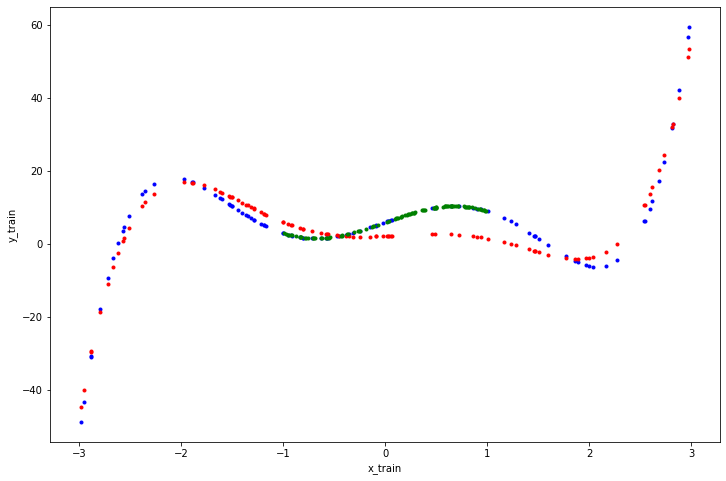

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# This the the cost or objective function. For a linear model, we use least
# mean square to calculate the error in our theta values.
def least_mean_square(y_actual, y_predicted):
      
    # calculating cost (we want the cost to be 0)
    # cost = np.sum( (y_actual - y_predicted) ** 2 ) / len(y_actual)
    cost = np.mean((y_predicted - y_actual) ** 2)
    return cost


# gradient descent
def gradient_descent(x, y_estimated, num_iterations = 10000, learning_rate = 0.0001):
    
    # initializing hyperparameters
    current_weight = np.ones((1, 5))
    current_bias = 0.1
    n = float(len(x))
    
    # estimating optimal parameters (theta values)
    for i in range(num_iterations):
        
        # predicting the y_estimated value from the linear equation y_estimated = mx + b
        y_predicted = (current_weight.dot(x.T)) + current_bias
        
        # calculating the current cost
        current_cost = least_mean_square(y_estimated, y_predicted)
          
        # calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y_estimated - y_predicted.T))
        bias_derivative = -(2/n) * sum(y_estimated - y_predicted.T)
          
        # updates weights and bias at the set learning rate
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        if (i % 1000 == 0):
            print("Iteration {}: Cost: {}, Weight: {}, Bias: {}".format(i, current_cost, current_weight, current_bias))
            
    return current_weight, current_bias


def main():
    # given data
    x_test = np.load('x_test.npy')
    y_test = np.load('y_test.npy')
    x_train = np.load('x_train.npy')
    y_train = np.load('y_train.npy')
    
    # creates x values of orders 2 - 5
    x2 = np.array(x_train)
    np.square(x_train, x2)
    x3 = np.array(x_train)
    x3 = np.power(x3, 3)
    x4 = np.array(x_train)
    x4 = np.power(x4, 4)
    x5 = np.array(x_train)
    x5 = np.power(x5, 5)
    
    # appends basis functions to x_train data
    x_trainBasis = np.array(x_train)
    x_trainBasis = np.append(x_trainBasis, x2, 1)
    x_trainBasis = np.append(x_trainBasis, x3, 1)
    x_trainBasis = np.append(x_trainBasis, x4, 1)
    x_trainBasis = np.append(x_trainBasis, x5, 1)
    
    # transposing the matrix
    y_train = np.reshape(y_train, (100, 1))
    
    # estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(x_trainBasis, y_train)
    print("Estimated Weight: {} -- Estimated Bias: {}".format(estimated_weight, estimated_bias))

    y_estimated = np.empty((100, 1))
    y_estimated = (estimated_weight.dot(x_trainBasis.T)) + estimated_bias
    y_estimated = np.reshape(y_estimated, (-1, 1))
    
    # plotting the test data line
    plt.figure(figsize = (12,8))
    # train data
    plt.scatter(x_train, y_train, marker='.', color='blue')
    # predicted model
    plt.scatter(x_train, y_estimated, marker='.', color='red')
    # test data
    plt.scatter(x_test, y_test, marker='.', color='green')
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.show()
  
if __name__=="__main__":
    main()
    

Iteration 0: Cost: 1837.0466354479993, Weight: [[0.96623728 0.99314792 0.96950528 0.99154136 0.99255438 0.95502814
  0.97713396 0.64536714 0.98459494 0.99297692]], Bias: [0.09297692]
Iteration 1000: Cost: 933.6555068976751, Weight: [[ 2.73665931  1.25498767  1.06913326  1.32361771  1.34294492  1.30683339
   1.1564087  -0.17425307  0.90953211  0.94733798]], Bias: [0.04733798]
Iteration 2000: Cost: 946.7634028256513, Weight: [[ 3.15185748  1.32595133  0.64868534  1.39784113  1.51359265  1.17374337
   1.07076593 -0.15585326  0.7573278   0.89318606]], Bias: [-0.00681394]
Iteration 3000: Cost: 955.7176313533951, Weight: [[ 3.4090897   1.38230989  0.42503405  1.44569118  1.63478728  1.04405971
   0.98642457 -0.13974001  0.6565701   0.85597923]], Bias: [-0.04402077]
Iteration 4000: Cost: 961.5928632160259, Weight: [[ 3.57300718  1.43056928  0.31152666  1.47750501  1.72796329  0.92169362
   0.90705441 -0.12572772  0.59222474  0.82965501]], Bias: [-0.07034499]
Iteration 5000: Cost: 965.43800541

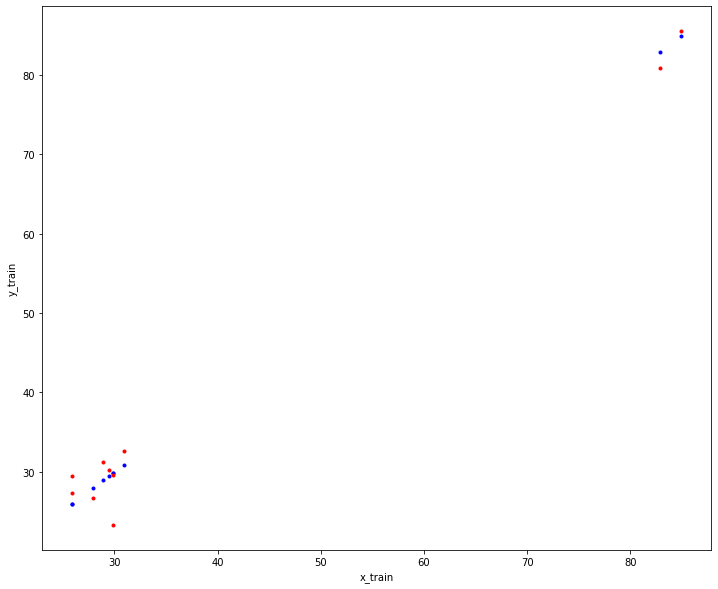

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
 # This the the cost or objective function. For a linear model, we use least
# mean square to calculate the error in our theta values.
def least_mean_square(y_actual, y_predicted):
      
    # calculating cost (we want the cost to be 0)
    # cost = np.sum( (y_actual - y_predicted) ** 2 ) / len(y_actual)
    cost = np.mean((y_predicted - y_actual) ** 2)
    return cost

# gradient descent
def gradient_descent(x, y_estimated, num_iterations = 10000, learning_rate = 0.0001):
    
    # initializing hyperparameters
    current_weight = np.ones((1, 10))
    current_bias = 0.1
    n = float(len(x))
    
    # estimating optimal parameters (theta values)
    for i in range(num_iterations):
        
        # predicting the y_estimated value from the linear equation y_estimated = mx + b
        y_predicted = (current_weight.dot(x.T)) + current_bias
        
        # calculating the current cost
        current_cost = least_mean_square(y_estimated, y_predicted)
          
        # calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y_estimated - y_predicted.T))
        bias_derivative = -(2/n) * sum(y_estimated - y_predicted.T)
          
        # updates weights and bias at the set learning rate
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        if (i % 1000 == 0):
            print("Iteration {}: Cost: {}, Weight: {}, Bias: {}".format(i, current_cost, current_weight, current_bias))
            
    return current_weight, current_bias


def main():
    # given data
    hogsmeade = pd.read_csv("Hogsmeade_Prices.csv")
    hp = np.array(hogsmeade)
    
    x = hp[:, 0:1]
    housePrice = hp[:10, 12]
    hp = hp[:10, 1:11 ]
    
    # transposing the matrix
    housePrice = np.reshape(housePrice, (10, 1))
    x = np.reshape(housePrice, (10, 1))
    
    # estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(hp, housePrice)
    print("Estimated Weight: {} -- Estimated Bias: {}".format(estimated_weight, estimated_bias))

    y_estimated = np.empty((10, 1))
    y_estimated = (estimated_weight.dot(hp.T)) + estimated_bias
    y_estimated = np.reshape(y_estimated, (-1, 1))
    
    # plotting the test data line
    plt.figure(figsize = (12,10))
    plt.scatter(x, housePrice, marker='.', color='blue')
    plt.scatter(x, y_estimated, marker='.', color='red')
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.show()
  
if __name__=="__main__":
    main()